<a href="https://colab.research.google.com/github/ShreyWey/Stock-Prediction/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import ipywidgets as widgets
from IPython.display import display
import datetime
import yfinance as yf

company_name = widgets.Text(description="Company Name:", placeholder="Enter company ticker")
start_date = widgets.DatePicker(description='Start Date:', value=datetime.date.today())
end_date = widgets.DatePicker(description='End Date:', value=datetime.date.today())

submit_button = widgets.Button(description="Submit")

display(company_name, start_date, end_date, submit_button)

def on_button_click(b):
    company = company_name.value
    start = start_date.value.strftime('%Y-%m-%d')  # Convert to 'YYYY-MM-DD' string format
    end = end_date.value.strftime('%Y-%m-%d')      # Convert to 'YYYY-MM-DD' string format

    print(f"Fetching data for {company} from {start} to {end}...")

    stock_data = yf.download(company, start=start, end=end)

submit_button.on_click(on_button_click)


Text(value='', description='Company Name:', placeholder='Enter company ticker')

DatePicker(value=datetime.date(2024, 9, 13), description='Start Date:')

DatePicker(value=datetime.date(2024, 9, 13), description='End Date:')

Button(description='Submit', style=ButtonStyle())

Fetching data for AAPL from 2014-08-11 to 2024-09-10...


[*********************100%***********************]  1 of 1 completed


In [3]:
import yfinance as yf

stock_data = yf.download(company_name.value, start_date.value, end_date.value)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-11,23.817499,24.020000,23.709999,23.997499,21.307558,146340000
2014-08-12,24.010000,24.219999,23.902500,23.992500,21.303116,135180000
2014-08-13,24.037500,24.309999,24.010000,24.309999,21.585026,127664000
2014-08-14,24.332500,24.392500,24.200001,24.375000,21.642742,112464000
2014-08-15,24.475000,24.547501,24.215000,24.495001,21.749289,195804000
...,...,...,...,...,...,...
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))

In [5]:
import numpy as np

def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [6]:
time_step = 100
X, y = create_dataset(scaled_data, time_step)

train_size=0.8
X_train, X_test = X[:int(X.shape[0]*train_size)], X[int(X.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0266
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 6.2683e-04
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - loss: 3.2362e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 3.0658e-04
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 2.6603e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - loss: 2.6118e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 2.5042e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 2.5762e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 2.7158e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - loss: 2.6036e-04


In [9]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.7799e-04
Test Loss: 0.0007731923251412809


In [10]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [11]:
original_data = stock_data['Close'].values
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1)

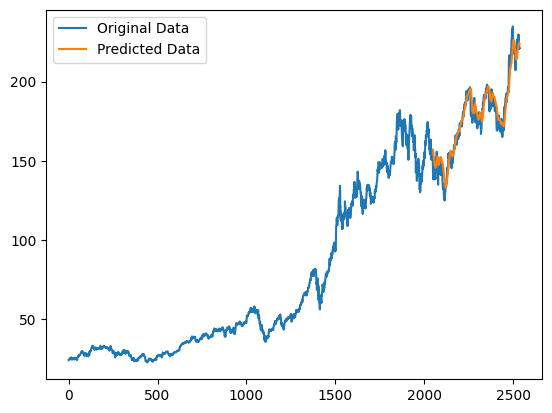

In [12]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [13]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([172.00378418, 172.26321411, 172.43411255, 172.77598572,
       173.83682251, 175.13952637, 176.55984497, 177.9834137 ,
       179.43289185, 180.70573425, 181.99578857, 183.27526855,
       184.60583496, 185.88275146, 187.04644775, 188.13893127,
       189.19494629, 190.06542969, 190.51994324, 190.89634705,
       191.18910217, 191.42938232, 191.68257141, 191.98327637,
       192.40109253, 192.87759399, 193.45318604, 193.96086121,
       194.54925537, 194.90600586, 195.98403931, 197.75315857,
       199.88375854, 201.98562622, 204.2000885 , 206.17523193,
       207.59712219, 208.46893311, 208.99505615, 209.32884216,
       209.77687073, 210.30047607, 210.61630249, 211.17710876,
       212.04417419, 213.10630798, 214.50875854, 216.09898376,
       217.74575806, 219.57966614, 221.05439758, 222.41705322,
       223.84576416, 225.22799683, 226.12158203, 226.39358521,
       226.2963562 , 225.9571991 , 225.5572052 , 224.74278259,
       223.6907959 , 222.59510803, 221.55839539, 220.65

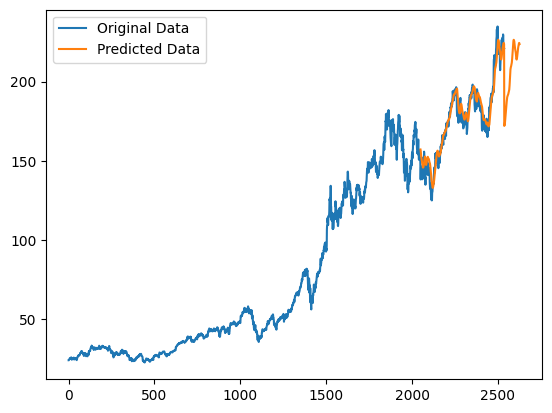

In [14]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()